<a href="https://colab.research.google.com/github/FGalvao77/Aprenda-como-selecionar-Features-para-seu-Modelo-de-Machine-Learning/blob/main/Aprenda_como_selecionar_Features_para_seu_Modelo_de_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aprenda como selecionar Features para seu Modelo de Machine Learning**

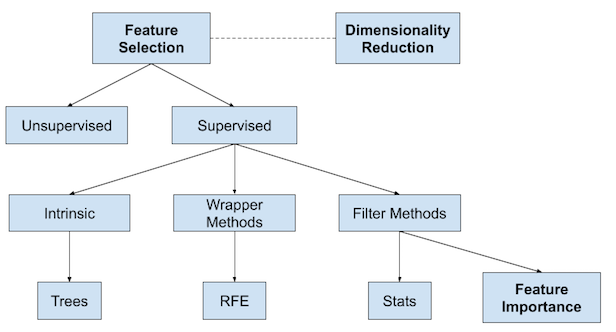

- Fonte: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

A `Feature Selection` ou seleção de variáveis, é uma etapa essencial no processo de criação de um modelo de machine learning. Antes de tudo iremos entender o por que redução de dimensionalidade é tão importante, e posteriormente iremos aplicar algumas técnicas de _feature selection_.

**Por que a redução de dimensionalidade é importante?**

No aprendizado de máquina, para capturar indicadores úteis e obter um resultado mais preciso, instintivamente adicionamos o máximo de features possível logo no início do processo. Porém, a partir de um certo momento, o desempenho do modelo começa a diminuir com o aumento do número de features. Este fenômeno é frequentemente referido como `“The Curse of Dimensionality”` (**A Maldição da Dimensionalidade**).

_A maldição da dimensionalidade ocorre porque a densidade do conjunto de dados diminui exponencialmente com o aumento da dimensionalidade._

Quando continuamos adicionando features sem aumentar o número de amostras do dataset de treinamento, a dimensionalidade do espaço de features aumenta e se torna cada vez mais esparsa. Devido a essa dispersão, torna-se muito mais fácil encontrar uma solução “perfeita” para o modelo de aprendizado de máquina, o que muito provavelmente leva ao problema do overfitting.

Então, como poderíamos superar a “Curse of Dimensionality” e evitar o overfitting, especialmente quando temos muitas features e comparativamente poucos exemplos de treinamento? Uma abordagem popular é a redução da dimensionalidade.

A redução de dimensionalidade é o processo de reduzir a dimensionalidade do espaço de features considerando a obtenção de um conjunto de features principais. A redução da dimensionalidade pode ser dividida em `feature selection` e `feature extraction`.

- _**Feature selection**_: é o processo de seleção de um subconjunto de features relevantes para uso na construção do modelo.
- _**Feature extraction**_:  cria novos recursos, projetando os dados de um espaço de alta dimensão para um espaço com menos dimensões. Essa abordagem também pode derivar features informativas e não redundantes de um conjunto original de features.

Cabe ressaltar aqui que podemos usar feature selection e feature extraction juntos. A feature extraction pode ser realizada, por exemplo, em um conjunto de features contendo apenas informação relevante que já passou pelo processo de feature selection, ao invés de ser aplicada no conjunto original. Mas por enquanto só vamos falar sobre feature selection.

A premissa central ao usar feature selection é que os dados contêm algumas features que são redundantes ou irrelevantes e, portanto, podem ser removidos sem levar a muitas perdas de informações.

Portanto, podemos resumir os benefícios de realizar feature selection nos seguintes tópicos:
- Reduz overfitting: ter menos dados redundantes significa menos chance de tomar decisões baseadas em ruído
- Aumenta a precisão: ter dados menos “enganosos” significa que a precisão da modelagem melhora.
- Reduz tempo de treinamento: ter menos dados reduz a complexidade do algoritmo e o torna mais rápido de treinar

Conheça mais em:

- `Medium`: 
    - [Como selecionar atributos para resolver a maldição da dimensionalidade](https://bit.ly/3Hlp2mY)
    - [Como selecionar as melhores features para seu modelo de Machine Learning](https://bit.ly/3c49LZD)
    - [Feature Selection](https://bit.ly/3nd7qla)
- `Wikipedia`: [Curse of dimensionality](https://bit.ly/3c9NBVU)

A ``Feature Selection`` deve ser feita depois da etapa de pré-processamento dos dados. Como já foi dito, o objetivo é selecionar as melhores variáveis como possíveis variáveis preditoras.

**Porque fazer Seleção de Features?**

- Algumas Features (Features não informativas) pode adicionar ruído ao modelo.
      Exemplo: nome, id, id_de_variaveis e etc.

- Modelos simples são explicativos, devemos evitar a perda da explicabilidade dos nossos modelos.

- Muitas features podem causar problemas como tempos excessivos para treino, ou ainda dificuldades de colocar modelos em produção.

A etapa de feature selection ajuda a reduzir o overfitting, aumenta a acurácia do modelo e reduz o tempo de treinamento.

## **Tipos de Algoritmos e Métodos**

- ``Filter Methods``: Métodos de seleção que utiliza medidas estatísticas para atribuir um score para cada feature. As features são classificadas pelo score para serem mantidas ou removidas do modelo. Normalmente se usam testes univariados que consideram a independência da feature com a variável alvo. Exemplo: chi squared, scores com coeficiente de correlação.

- ``Wrapper Methods``: Métodos de seleção que selecionam um conjunto de features, onde diferentes combinações são preparadas, avaliadas e comparadas. Um modelo preditivo é usado para avaliar a combinação de features a atribuir um score baseado em uma acurácia de modelo. Exemplo: algoritmo RFE

- ``Embedded Methods``: Métodos Embedded aprendem quais feature melhor contribuiem para a acurácia do modelo no momento de construção do modelo. Exemplo: métodos de penalização, algoritmos Lasso, Elastic NEt e Ridge Regression.

## **Seleção de Features com Python**

In [ ]:
# importando a biblioteca
import pandas as pd

In [ ]:
# instanciando o nome das colunas
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 
            'age', 'class']

In [ ]:
# carregando o arquivo de uma url
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv', 
                 names=colnames)

Essa é uma base de dados para trabalhar com classificação, onde o objetivo é prever através de algumas características se uma pessoa tem diabetes ou não.

In [ ]:
# visualizando as 5 primeiras linhas do df
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# informações gerais do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# visualizando a dimensão do conjunto de dados
df.shape    # linhas e colunas

(768, 9)

> Temos 9 colunas, sendo 8 as características e uma classe, a base não possui dados nulos.

In [ ]:
# verificando se há valores nulos/ausentes
df.isna().count().any()

True

Vamos visualizar graficamente se há valores nulos e/ou faltantes.

In [ ]:
# importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

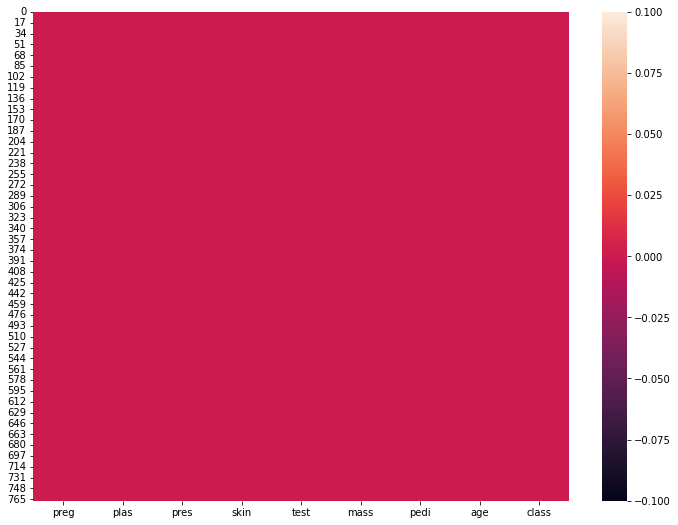

In [ ]:
# plotando o gráfico
plt.figure(figsize=(12, 9))
sns.heatmap(df.isnull());

In [ ]:
# realizando a contagem dos tipos de dados 
df.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [ ]:
# visualizando o tipo de dado das colunas
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

## **Separando os dados**
 - variávies independentes (explicativas)
 - variável dependente (resposta)

In [ ]:
X = df.drop(['class'], axis=1)  # extraindo o target da base das variáveis independentes
y = df['class']   # target (alvo)

## **Testes estatísticos**

Podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever.

**Métodos disponíveis:**

- ``f_classif:`` é adequado quando os dados são numéricos e a variável alvo é categórica.

- ``mutual_info_classif``: é mais adequando quando não há uma dependência linear entre as features e a variável alvo.

- ``f_regression``: aplicado para problemas de regressão.

O **Scikit-learn** fornece a função ``SelectkBest()`` que pode ser usada com diversos testes estatísticos. Informamos para o parâmetro ``k`` o número de recursos a serem selecionados como os mais importantes.

In [ ]:
# importando as funções do módulo "feature_selection" do scikit learn
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [ ]:
# instanciando o classificador "SelectKBest"
f_classif = SelectKBest(score_func=f_classif, 
                        k=4)    # estamos passando como argumentos a função "f_classif" e o número de recursos para seleção

In [ ]:
# realizando o treinamento do classificador com os dados das variáveis "X" e "y"
fit = f_classif.fit(X, y)

# aplicando o modelo nas variáveis explicativas
features = fit.transform(X)

In [ ]:
# visualizando as 4 features mais "importantes"
features

array([[  6. , 148. ,  33.6,  50. ],
       [  1. ,  85. ,  26.6,  31. ],
       [  8. , 183. ,  23.3,  32. ],
       ...,
       [  5. , 121. ,  26.2,  30. ],
       [  1. , 126. ,  30.1,  47. ],
       [  1. ,  93. ,  30.4,  23. ]])

> Segundo o **f_classif** essas são as ``4 características`` que tiveram a maior pontuação. Vamos descobrir quais são essas características.

Com a função `get_support()` podemos recuperar as **features** com maiores pontuações.
- temos que passar como arguemento **"(indices=True)"**

In [ ]:
# instanciando as features com as maiores pontuações
cols = fit.get_support(indices=True)

# visualizando as features
df.iloc[:, cols]

,preg,plas,mass,age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33
...,...,...,...,...
763,10,101,32.9,63
764,2,122,36.8,27
765,5,121,26.2,30
766,1,126,30.1,47


Através do método `.loc()` localizamos os respectivos índices das 4 características mais importantes.

## **Aplicando o Chi2**

``Mede a dependência entre variáveis estocásticas, o uso dessa função “elimina” os recursos com maior probabilidade de serem independentes da classe e, portanto, irrelevantes para a classificação.``


- **Scikit Learn**: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html


- Usado normalmente quando temos features categóricas e variável alvo categórica.

In [ ]:
# importando as funções 
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# instanciando o modelo para classificação das features (feature extraction)
test = SelectKBest(chi2, k=4)

# treinando o classificador
fit = test.fit(X, y)

# instanciando o resultado do classificador
features = fit.transform(X)

In [ ]:
# visualizando as features
features

array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In [ ]:
# aplicando o "get_support()"
print(fit.get_support(indices=True))

[1 4 5 7]


In [ ]:
# visualizando as features conforme seus índices
df.columns[[1, 4, 5, 7]]

Index(['plas', 'test', 'mass', 'age'], dtype='object')

In [ ]:
# instanciando as features classificadas
cols = fit.get_support(indices=True)

# visualizando as features
df.iloc[:, cols].head()

,plas,test,mass,age
0,148,0,33.6,50
1,85,0,26.6,31
2,183,0,23.3,32
3,89,94,28.1,21
4,137,168,43.1,33


In [ ]:
# contabilizando a dimensão 
df.iloc[:, cols].shape

(768, 4)

## **Aplicando o Recursive Feature Elimination – RFE**

Remove recursivamente os atributos e constrói o modelo com os atributos remanescentes, ou seja, os modelos são construídos a partir da remoção de features.

- Utiliza a acurácia do modelo para identificar atributos ou a combinação destes que melhor contribui para uma melhor performance.

- Em grandes bases de dados o tempo de processamento pode ser um problema.
Antes de aplicar essa técnica obrigatoriamente temos que ter um modelo de Machine Learning.

In [ ]:
# importando a função de regressão logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# instanciando o modelo
model = LogisticRegression(max_iter=2000)   # 2000 iterações

In [ ]:
# importando a função "Recursive Feature Elimination – RFE"
from sklearn.feature_selection import RFE

In [ ]:
# instanciando o modelo "Recursive Feature Elimination – RFE"
rfe = RFE(model, 4)

# aplicando o modelo nas variáveis explicativas e da resposta
feats = rfe.fit(X, y)

In [ ]:
# visualizando a quantidade de features classificadas
print(f'Número de features {feats.n_features_}.')

Número de features 4.


In [ ]:
# visualizando os índices das features classificadas
fit.get_support(indices=True)

array([0, 1, 5, 6])

In [ ]:
# visualizando as features classificadas conforme seus índices
df.columns[[0, 1, 5, 6]]

Index(['preg', 'plas', 'mass', 'pedi'], dtype='object')

In [ ]:
# visualizano as features - linhas
cols = fit.get_support(indices=True)
df.iloc[:, cols]

,preg,plas,mass,pedi
0,6,148,33.6,0.627
1,1,85,26.6,0.351
2,8,183,23.3,0.672
3,1,89,28.1,0.167
4,0,137,43.1,2.288
...,...,...,...,...
763,10,101,32.9,0.171
764,2,122,36.8,0.340
765,5,121,26.2,0.245
766,1,126,30.1,0.349


Precisamos informar ao RFE o número de atributos caso contrário ele tentará reduzir pela metade esse valor de acordo com o número de features do conjunto de dados.

## **Feature Importance**

Métodos ensembles como o algoritmo ``Random Forest``, podem ser usados para estimar a importância de cada atributo. Ele retorna um score para cada atributo, quanto maior o score, maior é a importância desse atributo.

In [ ]:
# importando a função para classificação "RandomForestClassifier"
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# instanciando o modelo de classificação (feature extraction)
model = RandomForestClassifier(n_estimators=10)

In [ ]:
# aplicando o treinamento do modelo nas variáveis explicativas e de resposta
model.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# visualizando o score de cada um dos atributos
model.feature_importances_

array([0.08751317, 0.27313854, 0.0905915 , 0.06519674, 0.06520954,
       0.15962408, 0.1338138 , 0.12491262])

In [ ]:
# nomes das colunas
colnames

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [ ]:
# visualizando em porcentagem a classificação das features e seus respectivos nomes
model.feature_importances_ * 100, X.columns

(array([ 8.75131694, 27.31385433,  9.05915018,  6.51967412,  6.52095404,
        15.96240784, 13.38138015, 12.4912624 ]),
 Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object'))

In [ ]:
# criando um Dataframe com as colunas e seus scores
import pandas as pd

features_importances = pd.DataFrame(model.feature_importances_,
                                    index = X.columns,
                                    columns=['importance']).sort_values('importance', 
                                                                        ascending=False)

In [ ]:
# visualizando o dataframe criado
features_importances

,importance
plas,0.273139
mass,0.159624
pedi,0.133814
age,0.124913
pres,0.090592
preg,0.087513
test,0.065210
skin,0.065197


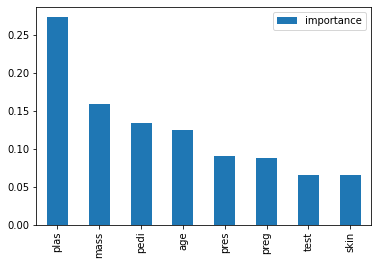

In [ ]:
# visualizando a importância das features de forma gráfica
features_importances.plot(kind='bar');

## **Automatizando a Seleção de Features**

- Se estiver usando scikit-learn podemos usar Pipelines para automatização.

- Incluímos a feature selection como uma das etapas do pipeline.

In [ ]:
# importando a função para criação de "pipeline" de modelos
from sklearn.pipeline import Pipeline

In [ ]:
# instancaindo os classificadores na função "Pipeline"
clf = Pipeline([
                ('feature_selection', RFE(LogisticRegression(max_iter=200), 4)),
                ('classification', RandomForestClassifier())
])

In [ ]:
# aplicando o treinamento do pipeline nas variáveis explicativas e de resposta
clf.fit(X, y)

Pipeline(memory=None,
         steps=[('feature_selection',
                 RFE(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                  dual=False,
                                                  fit_intercept=True,
                                                  intercept_scaling=1,
                                                  l1_ratio=None, max_iter=200,
                                                  multi_class='auto',
                                                  n_jobs=None, penalty='l2',
                                                  random_state=None,
                                                  solver='lbfgs', tol=0.0001,
                                                  verbose=0, warm_start=False),
                     n_features_to_select=4, step=1, verbose=0)),
                ('classif...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        cl

In [ ]:
# visualizando as etapas do Pipeline
clf.steps

[('feature_selection',
  RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=200,
                                   multi_class='auto', n_jobs=None, penalty='l2',
                                   random_state=None, solver='lbfgs', tol=0.0001,
                                   verbose=0, warm_start=False),
      n_features_to_select=4, step=1, verbose=0)),
 ('classification',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='auto',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jo

## **Qual Método utilizar?**

- Tente usar o RFE caso tenha recursos computacionais para isso.

- Se estiver trabalhando com Classificação e as features forem numéricas utilize f_classif ou mutual_info_classif.

- Se estiver trabalhando com Regressão e as features forem numéricas utilize f_regression ou mutual_info_regression.

- Caso esteja trabalhando com features categóricas utilize chi2
Automatize essa etapa com Pipelines para evitar erros.

## **Aula sobre Feature Selection:**
- https://youtu.be/4RGT2YRHERY

## **Conclusão:**

Nesse artigo você conheceu as técnicas mais usadas para a seleção de recursos numéricos ou categóricos.

A seleção de features é uma tarefa muito importante em um projeto de Data Science, uma vez que os algoritmos são altamente influenciados pela qualidade dos atributos, se as features forem ineficientes os algoritmos de Machine Learning não tem um bom desempenho.

Espero que tenha gostado e se você tiver alguma dúvida ou sugestão basta deixar um comentário, vamos gostar de interagir com você.

## **Vamos realizar a seleção das features em outra base de dados**

**Detalhes**

Esse arquivo que iremos utilizar é dos resultados do ENEM 2016 e, que está dispoinível neste link [`train.csv`](https://github.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/blob/main/datasets/train.csv).

Qualquer dúvida a respeito das colunas, consulte o [**Dicionário dos Microdados do Enem 2016**](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Porém o desafio é descobrir quais `features` tem maior influência com a nota da prova de matemática no arquivo [`test.csv`](https://github.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/blob/main/datasets/test.csv) e, por fim criar um modelo preditivo para nota da prova de matemática **(coluna NU_NOTA_MT)**.

**Vamos para o desafio!**



In [ ]:
# # realizando o carregamento do conjunto de dados para google colab
# from google.colab import files  # biblioteca utilizada para carregar os dados para o google colab
# uploaded = files.upload()

Saving test.csv to test.csv


In [145]:
# importando a biblioteca
import pandas as pd

In [146]:
# instanciando os dados direto da url
train = 'https://raw.githubusercontent.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/main/datasets/train.csv'
test = 'https://raw.githubusercontent.com/FGalvao77/Previsao-da-nota-de-matematica-do-Enem-2016/main/datasets/test.csv'

In [147]:
# instanciando os conjuntos de dados
# df_train = pd.read_csv('train.csv', sep=',' , encoding='UTF8' )
# df_test = pd.read_csv('test.csv', sep=',' , encoding='UTF8' )

df_train = pd.read_csv(train, sep=',' , encoding='UTF8' )
df_test = pd.read_csv(test, sep=',' , encoding='UTF8' )

In [159]:
# quantidade de features nos dados de treino e teste
len(df_train.columns), len(df_test.columns)

(167, 47)

In [160]:
# visualizando a qunatidades de linhas e colunas nas bases de dados
print(df_train.shape, df_test.shape)

(13730, 167) (4576, 47)


In [161]:
# visualizando as 5 primeiras linhas da coluna alvo do df_train
df_train['NU_NOTA_MT'].head()

0    399.4
1    459.8
2      NaN
3      NaN
4      NaN
Name: NU_NOTA_MT, dtype: float64

In [162]:
# contabilizando os valores ausentes das bases de dados
print('df_train:', df_train.isna().value_counts().sum())
print('df_test:', df_test.isna().value_counts().sum())

df_train: 13730
df_test: 4576


In [163]:
# contabilizando os valores ausentes somente do df_train e do nosso alvo
df_train['NU_NOTA_MT'].isna().value_counts().sum()

13730

In [164]:
# verificando se há valores ausentes no df_train como todo e contabilizando-os
df_train.isna().sum()

Unnamed: 0                 0
NU_INSCRICAO               0
NU_ANO                     0
CO_MUNICIPIO_RESIDENCIA    0
NO_MUNICIPIO_RESIDENCIA    0
                          ..
Q046                       0
Q047                       0
Q048                       0
Q049                       0
Q050                       0
Length: 167, dtype: int64

**Vamos melhor essa visualização de forma gráfica**


In [165]:
# importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

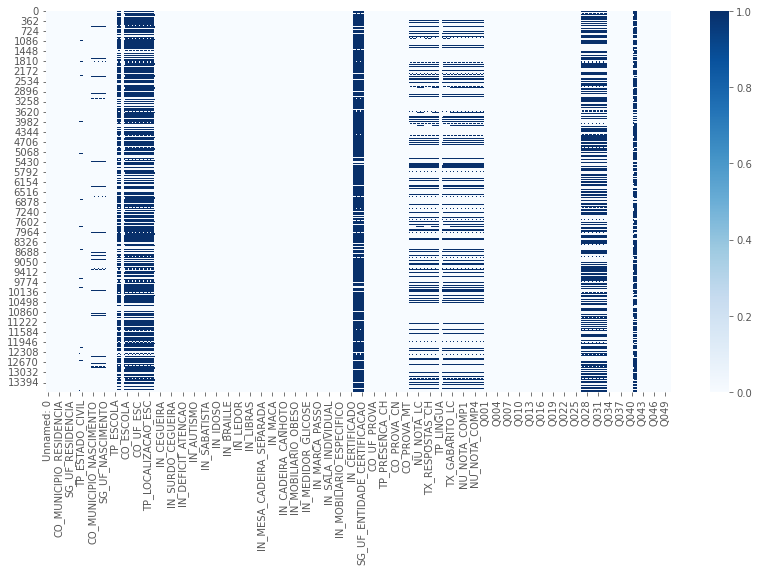

In [182]:
# verificando se há valores nulos no df
# caso exista, haverá linhas brancas no gráfico
plt.figure(figsize=(14, 7))
sns.heatmap(df_train.isnull(), cmap='Blues', cbar=True);

> Temos valores ausentes, pórem essa visualização está um tanto confusa.

Para melhor nossa visualização vamos selecionar algumas `features`.

In [193]:
# informações gerais dos dados de treino
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [189]:
# informções gerais dos dados de teste
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 47 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            4576 non-null   object 
 1   CO_UF_RESIDENCIA        4576 non-null   int64  
 2   SG_UF_RESIDENCIA        4576 non-null   object 
 3   NU_IDADE                4576 non-null   int64  
 4   TP_SEXO                 4576 non-null   object 
 5   TP_COR_RACA             4576 non-null   int64  
 6   TP_NACIONALIDADE        4576 non-null   int64  
 7   TP_ST_CONCLUSAO         4576 non-null   int64  
 8   TP_ANO_CONCLUIU         4576 non-null   int64  
 9   TP_ESCOLA               4576 non-null   int64  
 10  TP_ENSINO               1480 non-null   float64
 11  IN_TREINEIRO            4576 non-null   int64  
 12  TP_DEPENDENCIA_ADM_ESC  1480 non-null   float64
 13  IN_BAIXA_VISAO          4576 non-null   int64  
 14  IN_CEGUEIRA             4576 non-null   

Com a função `.corr()` vamos identificar quais as colunas **(features)** que mais possuem correlação com o target **(NU_NOTA_MT)**.

Iremos também realizar um `.dropna()` **(excluir valores ausentes)** e também um `.sort_values(ascending=False)` **(deixar em ordem crescente)** e, em seguida exibir as 15 primeiras linhas para mostrar as que possuem maior valor de correlação.

In [190]:
df_train.corr()['NU_NOTA_MT'].dropna().sort_values(ascending=False).head(15)

NU_NOTA_MT                 1.000000
NU_NOTA_CN                 0.584941
NU_NOTA_CH                 0.529594
NU_NOTA_LC                 0.494695
NU_NOTA_REDACAO            0.379376
TP_DEPENDENCIA_ADM_ESC     0.373233
NU_NOTA_COMP3              0.350307
NU_NOTA_COMP5              0.343337
NU_NOTA_COMP4              0.342282
NU_NOTA_COMP2              0.335638
NU_NOTA_COMP1              0.299402
CO_MUNICIPIO_NASCIMENTO    0.113416
CO_UF_NASCIMENTO           0.112236
CO_MUNICIPIO_PROVA         0.109433
CO_MUNICIPIO_RESIDENCIA    0.108850
Name: NU_NOTA_MT, dtype: float64

Vamos separar as **features** até a `NU_NOTA_COMP1`, que são as que apresenta maiores valores de correlção e, em seguida plotar um gráfico de correlação.

**Mas antes, vamos instanciar as colunas em uma lista para posteriormente realizarmos manipulações e análises.**

In [194]:
# instanciando as features principais da base df_train

plt.style.use('ggplot')

features = [
            'NU_NOTA_MT',
            'NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            'NU_NOTA_REDACAO',
            'TP_DEPENDENCIA_ADM_ESC',
            'NU_NOTA_COMP1',
            'NU_NOTA_COMP2',
            'NU_NOTA_COMP3',
            'NU_NOTA_COMP4',
            'NU_NOTA_COMP5'
            ]

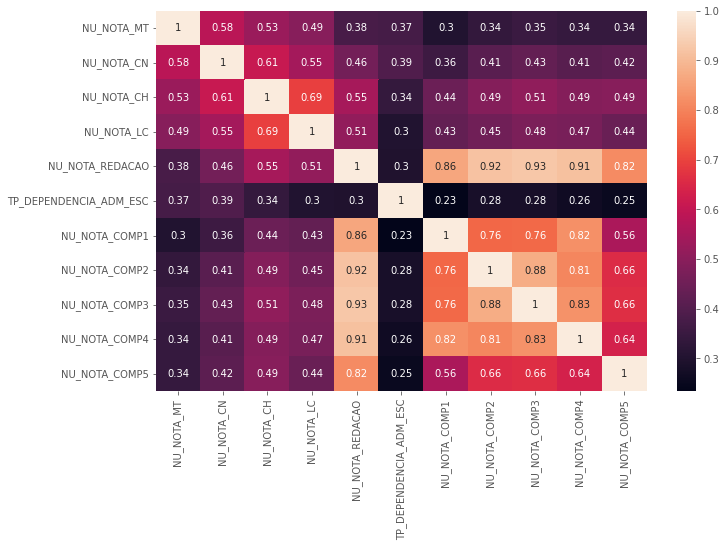

In [195]:
# plotando gráfico de calor para uma melhor visualização da correlação do df_train
# aqui utilizaremos somentes as features selecionadas
corr = df_train[features].corr() 
ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10});

Agora que temos as nossas principais `features`, vamos novamente plotar o gráfico para visualizar os valores ausentes

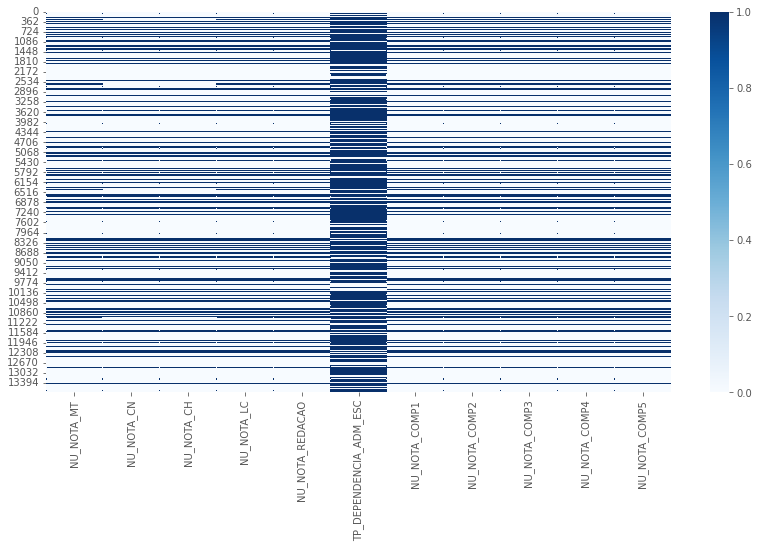

In [196]:
# verificando se há valores nulos no df
# caso exista, haverá linhas brancas no gráfico
plt.figure(figsize=(14, 7))
sns.heatmap(df_train[features].isnull(), cmap='Blues', cbar=True);

>> Realmente há muitos valores ausentes. E precisaremos tratar de alguma forma este problema!!

Primeiro vamos explorar essa situação um pouco mais.

In [197]:
# aqui iremos visualizar a quantidade de dados ausentes proporcional a quantidade total de dados em cada coluna
total = df_train[features].isnull().sum().sort_values(ascending = False)
percentual = (df_train[features].isnull().sum()/df_train[features].isnull().count()*100).sort_values(ascending = False)
faltantes  = pd.concat([total, percentual], axis=1, keys=['Total', 'Dados faltando (%)'])
faltantes.head(len(features))     # visualizando em relação a quantidade de features

,Total,Dados faltando (%)
TP_DEPENDENCIA_ADM_ESC,9448,68.812819
NU_NOTA_COMP5,3597,26.198106
NU_NOTA_COMP4,3597,26.198106
NU_NOTA_COMP3,3597,26.198106
NU_NOTA_COMP2,3597,26.198106
NU_NOTA_COMP1,3597,26.198106
NU_NOTA_REDACAO,3597,26.198106
NU_NOTA_LC,3597,26.198106
NU_NOTA_MT,3597,26.198106
NU_NOTA_CH,3389,24.683176


Vamos partir para uma estratégia para tratar esses dados ausentes

In [198]:
# realizando uma cópia de cada conjunto de dados 
# para podermos trata os dados ausentes e não sobrescrever as bases principais
df_train_01 = df_train.copy()
df_test_01 = df_test.copy()

A príncipio irei adotar a estratégia de preencher com o valor da `média` de cada coluna.

In [199]:
# vamos realizar o preenchimento dos dados faltantes com o valor da média
media_train = df_train_01.mean()
media_test = df_test_01.mean()

In [200]:
# atribuindo os valores para onde há valores faltantes
df_train_01.fillna(value=media_train, inplace=True)
df_test_01.fillna(value=media_test, inplace=True)

In [201]:
# vamos novamente visualizar a quantidade de dados ausentes proporcional a quantidade total de dados em cada coluna
total = df_train_01[features].isnull().sum().sort_values(ascending = False)
percentual = (df_train_01[features].isnull().sum()/df_train_01[features].isnull().count()*100).sort_values(ascending = False)
faltantes  = pd.concat([total, percentual], axis=1, keys=['Total', 'Dados faltando (%)'])
faltantes.head(len(features))

,Total,Dados faltando (%)
NU_NOTA_COMP5,0,0.0
NU_NOTA_COMP4,0,0.0
NU_NOTA_COMP3,0,0.0
NU_NOTA_COMP2,0,0.0
NU_NOTA_COMP1,0,0.0
TP_DEPENDENCIA_ADM_ESC,0,0.0
NU_NOTA_REDACAO,0,0.0
NU_NOTA_LC,0,0.0
NU_NOTA_CH,0,0.0
NU_NOTA_CN,0,0.0


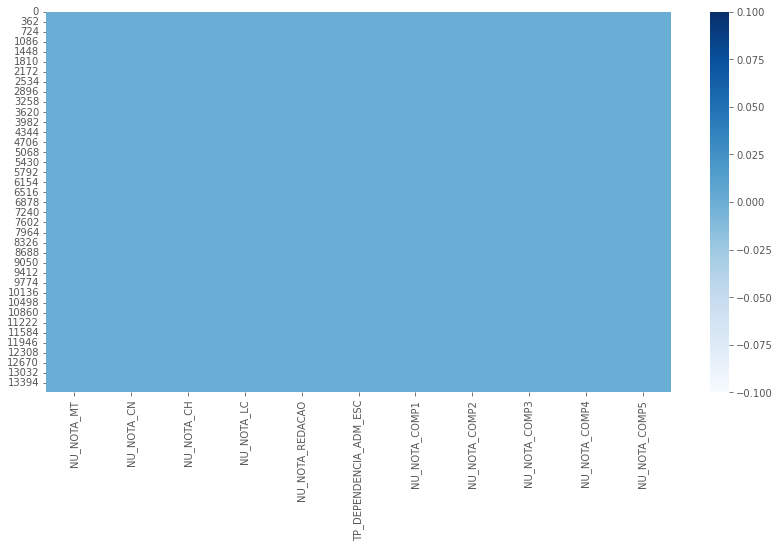

In [202]:
# vamos plotar o gráfico novamente depois de tratado os dados ausentes
# verificando se há valores nulos no df_train_01
# caso exista, haverá linhas brancas no gráfico
plt.figure(figsize=(14, 7))
sns.heatmap(df_train_01[features].isnull(), cmap='Blues', cbar=True);

>> Legal ; ) Conseguimos resolver este problema!! Vamos adiante...

O **Scikit-learn** fornece a função ``SelectkBest()`` que pode ser usada com diversos testes estatísticos. Informamos para o parâmetro ``k`` o número de recursos a serem selecionados como os mais importantes.

Podem ser usados para selecionar os atributos que possuem forte relacionamento com a variável que estamos tentando prever.

**Métodos disponíveis:**

- ``f_classif:`` é adequado quando os dados são numéricos e a variável alvo é categórica.

- ``mutual_info_classif``: é mais adequando quando não há uma dependência linear entre as features e a variável alvo.

- ``f_regression``: aplicado para problemas de regressão.

**Como nosso problema é de regressão, utilizaremos o `f_regression`**

In [203]:
# importando a função
from sklearn.feature_selection import SelectKBest, f_regression

In [204]:
# instanciando o nosso modelo
f_regr = SelectKBest(score_func=f_regression, 
                     k=9)

In [205]:
# separando a base
X_train = df_train_01[features]
y_train = df_train_01['NU_NOTA_MT']
# X_test = df_test_01

In [206]:
# treinando o modelo
fit = f_regr.fit(X_train, y_train)
features = fit.transform(X_train)

In [207]:
# visualizando o resultado
features

array([[399.4       , 436.3       , 495.4       , ..., 120.        ,
         80.        ,  80.        ],
       [459.8       , 474.5       , 544.1       , ..., 120.        ,
        120.        ,  80.        ],
       [482.49792756, 473.49515521, 529.66108694, ..., 106.82423764,
        113.12395145,  77.37244646],
       ...,
       [398.        , 460.5       , 528.9       , ..., 120.        ,
        120.        , 120.        ],
       [386.6       , 422.5       , 621.7       , ...,  80.        ,
         80.        , 100.        ],
       [428.9       , 488.7       , 575.3       , ...,  80.        ,
        120.        ,  80.        ]])

In [208]:
# visualizando as colunas
cols = fit.get_support(indices=True)
X_train.iloc[:, cols].head(10)

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,399.400000,436.300000,495.400000,581.200000,520.000000,120.000000,120.000000,80.000000,80.000000
1,459.800000,474.500000,544.100000,599.000000,580.000000,120.000000,120.000000,120.000000,80.000000
2,482.497928,473.495155,529.661087,516.472841,529.048258,111.915918,106.824238,113.123951,77.372446
3,482.497928,473.495155,529.661087,516.472841,529.048258,111.915918,106.824238,113.123951,77.372446
4,482.497928,473.495155,529.661087,516.472841,529.048258,111.915918,106.824238,113.123951,77.372446
5,364.500000,439.700000,583.200000,410.900000,620.000000,120.000000,120.000000,160.000000,100.000000
6,529.200000,420.100000,604.200000,484.500000,560.000000,120.000000,120.000000,120.000000,100.000000
7,566.700000,619.600000,625.800000,611.200000,620.000000,120.000000,120.000000,120.000000,120.000000
8,372.400000,500.500000,555.200000,521.800000,680.000000,160.000000,140.000000,140.000000,100.000000
9,482.497928,473.495155,529.661087,516.472841,529.048258,111.915918,106.824238,113.123951,77.372446


>> Conseguimos identificar quais `features` principais

# **Agora vamos fazer as nossas predições**

**Pórem iremos aplicar outras técnicas. Vamos adiante...**

## **Aplicando One Hot Encoder**

In [209]:
# instale o category_encoders
!pip install category_encoders

In [210]:
# importando a biblioteca
from category_encoders import OneHotEncoder

In [211]:
# instanciando o modelo
ohe = OneHotEncoder(use_cat_names=True)

O `use_cat_names=True` coloca o nome de cada categoria no inicio de cada coluna.

In [212]:
# treinando o modelo
X_train = ohe.fit_transform(X_train)

In [213]:
# visualizando o resultado do one hot encoder
X_train.head()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5
0,399.400000,436.300000,495.400000,581.200000,520.000000,2.259692,120.000000,120.000000,120.000000,80.000000,80.000000
1,459.800000,474.500000,544.100000,599.000000,580.000000,2.000000,140.000000,120.000000,120.000000,120.000000,80.000000
2,482.497928,473.495155,529.661087,516.472841,529.048258,2.259692,119.811704,111.915918,106.824238,113.123951,77.372446
3,482.497928,473.495155,529.661087,516.472841,529.048258,2.259692,119.811704,111.915918,106.824238,113.123951,77.372446
4,482.497928,473.495155,529.661087,516.472841,529.048258,2.259692,119.811704,111.915918,106.824238,113.123951,77.372446


## **Aplicando um pré-processador**

O `StandardScaler` executa a tarefa de padronização, ou seja, transforma todas as features para que elas fiquem em uma mesma escala. **Cada coluna vai ter média igual a 0 e desvio padrão igual a 1**.

E pra isso iremos importar tanto o `StandardScaler` como o `MinMaxScaler`

In [214]:
# importando as funções
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [215]:
# instanciando o modelo
scaler = StandardScaler().fit(X_train)

In [216]:
# visualizando o modelo
StandardScaler(copy=True,
               with_mean=True, with_std=True )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [217]:
# aplicando o modelo e realizando a transformação dos dados
valores_scalados = scaler.transform(X_train)

In [218]:
# visualizando os valores escalados da primeira linha
valores_scalados[:1]

array([[-9.69020120e-01, -6.02879362e-01, -5.35492559e-01,
         1.09696343e+00, -6.82655339e-02,  1.13844777e-15,
         7.34415151e-03,  2.78935852e-01,  4.46628135e-01,
        -1.15171214e+00,  7.10220523e-02]])

In [219]:
# visualizando a quantidade de linhas e colunas
valores_scalados.shape

(13730, 11)

In [220]:
# aplicando o StanderScaler nos dados de treino
X_train = scaler.transform(X_train)

Iremos aplicar o `DecisionTreeRegressor`

In [221]:
# importando a biblioteca 
from sklearn.tree import DecisionTreeRegressor
reg_tree = DecisionTreeRegressor()

In [222]:
# passando para o modelo os dados de treino 
reg_tree = reg_tree.fit(X_train, y_train)

In [223]:
# # avaliando a acurácia
acuracia = reg_tree.score(X_train, y_train)
acuracia

0.99999999999983

É necessário aplicar todos os métodos acima para os dados de teste, garantindo que eles estejam no mesmo formato do dados de treino, caso contrário o modelo não será capaz de prever novos resultados ou essa previsão será muito ruim.